Deep Learning :

Deep learning is a subset of machine learning that focuses on neural networks with many layers (hence the term "deep") to model and understand the complex pattern in data. It has revolutionized the field of artificial intelligence (AI) by enabling the modeling of complex patterns and representations in data.
 It is particulerly effective for tasks where traditional algorithm struggle such as image and speech recognition and NLP and handling large dataset.

Neural Networks :
these are class of machine learning  algorithm inspired by structure and function of human brain.They are designed to recognize patterns make predictions and solve complex problems by leaning from data

Neural network consists of layers of interconnected nodes(neurons).where each connection has an associated weights

Input layers: Recieves the initial data.
Hidden layers : Multiple layers where data is processed through neurons with activation function
Output layers : Produces the final prediction or classification

Activation function:
Introduce non-linearity to the model, enabling it to learn complex patterns.
Common activation functions include Sigmoid, Tanh, ReLU (Rectified Linear Unit), and its variants like Leaky ReLU and Parametric ReLU.

Loss function:
Quantify the difference between the predicted output and the actual target. Common loss functions include Mean Squared Error (MSE) for regression tasks and Cross-Entropy Loss for classification tasks.

Optimization Algorithm :
Algorithms used to minimize the loss function by adjusting the network’s parameters. Popular ones include Stochastic Gradient Descent (SGD), Adam, RMSprop, and AdaGrad.

Forward Propagation :
The process of passing input data through the network layers to obtain the output.

Backward Propagation :
The process of adjusting weights and biases based on the error in the output, using gradient descent optimization techniques.

In [ ]:
!pip install tensorflow-gpu


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [ ]:
# import some basics libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv(r'/content/Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# Divide the dataset into independet and dependent

In [ ]:
x=data.iloc[:,3:13]
y=data.iloc[:,13]

In [ ]:
# feature Engineering
geography=pd.get_dummies(x['Geography'],drop_first=True)
gender=pd.get_dummies(x['Gender'],drop_first=True)

In [ ]:
# concatenate these variables with dataframe
x=x.drop(['Geography','Gender'],axis=1)

In [ ]:
x=pd.concat([x,geography,gender],axis=1)
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,True,False,True


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
# feature scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [ ]:
x_train.shape,x_test.shape

((8000, 11), (2000, 11))

In [ ]:
# Part 2 : Now lets create the ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [ ]:
# Lets initialize the ANN
classifier=Sequential()

In [ ]:
# adding the input layer
classifier.add(Dense(units=11,activation='relu'))

In [ ]:
# adding the first hidden layer
classifier.add(Dense(units=7,activation='relu'))

In [ ]:
# adding the second hidden layer
classifier.add(Dense(units=6,activation='relu'))

In [ ]:
# adding the output layer
classifier.add(Dense(1,activation='sigmoid'))

In [ ]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [ ]:
#Early stopping
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [ ]:
model_history=classifier.fit(x_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3168 - accuracy: 0.8679 - val_loss: 0.3646 - val_accuracy: 0.8485
Epoch 2/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.3162 - accuracy: 0.8684 - val_loss: 0.3673 - val_accuracy: 0.8493
Epoch 3/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.3168 - accuracy: 0.8724 - val_loss: 0.3646 - val_accuracy: 0.8455
Epoch 4/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3166 - accuracy: 0.8675 - val_loss: 0.3676 - val_accuracy: 0.8432
Epoch 5/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3171 - accuracy: 0.8677 - val_loss: 0.3673 - val_accuracy: 0.8448
Epoch 6/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3166 - accuracy: 0.8705 - val_loss: 0.3729 - val_accuracy: 0.8364
Epoch 7/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3159 - accuracy: 0.8681 - val_loss: 0.3666 - val_accuracy:

In [ ]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

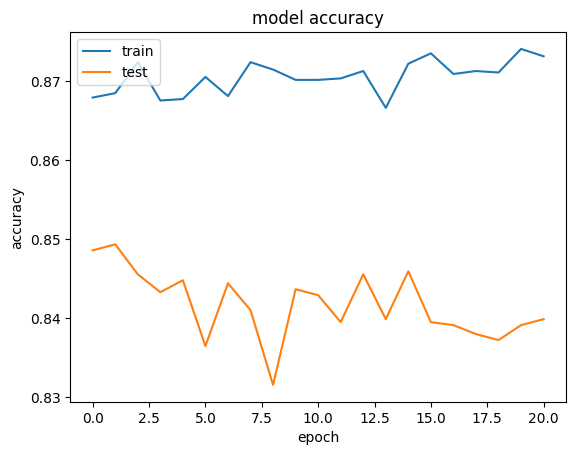

In [ ]:
#summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

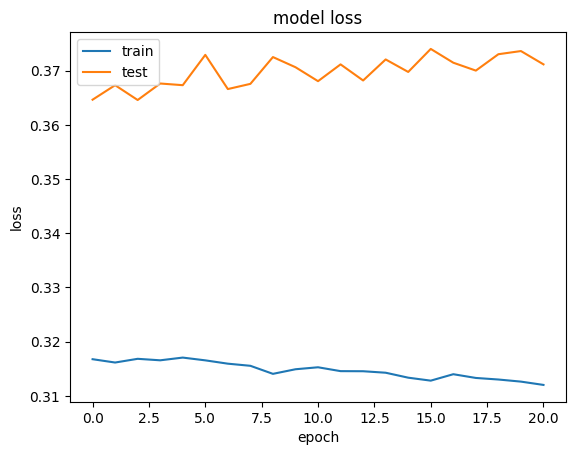

In [ ]:
#summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# Part-3 Making the predictions and evaluating the model
y_pred=classifier.predict(x_test)
y_pred=(y_pred>0.5)
y_pred

63/63 [==============================] - 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [False]])

In [ ]:
#Make the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[1536,   71],
       [ 214,  179]])

In [ ]:
#calculate the accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.8575

In [ ]:
# get the weights
classifier.get_weights()

[array([[-3.87396244e-03, -4.71223257e-02, -1.25057861e-01,
         -5.68845496e-02, -1.34498939e-01,  1.05078906e-01,
          4.27140258e-02, -1.96615443e-01, -4.52043861e-02,
          4.24769856e-02,  3.21215391e-01],
        [ 4.48322147e-01, -1.89203024e-01, -6.81035995e-01,
          2.74551697e-02, -3.41671646e-01, -1.59976408e-01,
          2.74702311e-01,  2.41216779e-01, -6.11404061e-01,
         -2.74378151e-01, -3.44065726e-01],
        [ 8.28614682e-02,  7.15883747e-02, -2.06313282e-01,
         -3.87659185e-02, -5.62637895e-02, -9.97373760e-02,
         -2.18518615e-01, -4.57018763e-02, -2.61147041e-02,
         -6.06379360e-02,  9.85114947e-02],
        [-8.01432994e-04,  6.33736670e-01, -3.64136428e-01,
          2.02971891e-01,  1.10903144e+00,  4.16626275e-01,
         -4.96937871e-01, -1.76319689e-01, -2.03667805e-02,
         -9.49047565e-01, -2.39775628e-01],
        [-3.54789831e-02,  7.11742222e-01,  9.49968472e-02,
          9.13257599e-01,  1.49572268e-01, -